# Nomenclating Galactic Aliens through DNA Analysis

In [1]:
# let's make the basic imports

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 180 # set the resolution to x dpi

# data = pd.read_csv("./datasets/test_cleaned.csv")
data = pd.read_csv("./datasets/finalDataSet_cleaned.csv")
data.describe()

,new_x0,new_x1,new_x2,new_x3,new_x4,new_x5,new_x6,new_x7,new_x8,new_x9,...,new_x171,new_x172,new_x173,new_x174,new_x175,new_x176,new_x177,new_x178,new_x179,target
count,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,...,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,2.495600e+04,24956.000000
mean,7.999736e-16,-7.380430e-18,3.520582e-16,-7.742444e-17,8.390790e-17,2.745573e-16,4.258495e-16,-1.110512e-16,2.561507e-16,-9.646608e-17,...,-7.313212e-18,1.577596e-16,-2.990459e-16,-7.543437e-17,4.228833e-17,-9.937437e-17,1.089940e-16,2.476277e-16,7.269875e-17,12.900385
std,1.019641e+00,5.011193e-01,4.823376e-01,4.667244e-01,4.578314e-01,4.403082e-01,4.326659e-01,4.260048e-01,4.231419e-01,4.146797e-01,...,1.198502e-01,1.189663e-01,1.185140e-01,1.173196e-01,1.172541e-01,1.162791e-01,1.159768e-01,1.149850e-01,1.140239e-01,6.759101
min,-1.217616e+00,-1.229095e+00,-1.184478e+00,-1.058954e+00,-1.584681e+00,-1.345245e+00,-1.437065e+00,-1.370281e+00,-1.291294e+00,-1.005868e+00,...,-7.954672e-01,-6.367923e-01,-6.811296e-01,-6.326292e-01,-6.551276e-01,-6.626206e-01,-5.874124e-01,-6.715152e-01,-6.385976e-01,0.000000
25%,-8.931880e-01,-3.057613e-01,-2.828671e-01,-3.302220e-01,-2.209579e-01,-2.972246e-01,-2.485796e-01,-2.675098e-01,-2.486104e-01,-1.978520e-01,...,-2.102645e-02,-2.416868e-02,-2.560912e-02,-4.164512e-02,-2.912335e-02,-2.902766e-02,-2.670082e-02,-3.308847e-02,-2.951994e-02,7.000000
50%,-5.959937e-01,-5.021734e-02,2.241398e-03,-1.721923e-02,2.919972e-02,2.338281e-02,-6.628373e-03,-1.930203e-02,-1.661208e-02,-2.978526e-02,...,6.086020e-05,-1.410823e-04,-7.228355e-05,-2.606203e-03,-1.194971e-03,-1.176944e-03,-1.417921e-03,2.800151e-03,-5.678225e-04,14.000000
75%,1.137990e+00,2.612384e-01,2.362270e-01,2.917157e-01,2.582057e-01,2.984641e-01,1.873073e-01,2.408003e-01,2.483858e-01,2.417868e-01,...,2.953497e-02,2.660152e-02,3.282032e-02,3.003980e-02,3.713026e-02,3.133540e-02,2.406852e-02,2.447704e-02,2.026634e-02,19.000000
max,2.050462e+00,1.516534e+00,1.689275e+00,1.283192e+00,1.616564e+00,1.382076e+00,1.658829e+00,1.526785e+00,1.340314e+00,1.029519e+00,...,8.478128e-01,6.930011e-01,7.863801e-01,8.644074e-01,8.335184e-01,7.097751e-01,6.957089e-01,6.807739e-01,6.649186e-01,21.000000


In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def show_confusion_matrix(true_labels, learned_labels, class_names):

    cmat = confusion_matrix(true_labels, learned_labels) 

    plt.figure(figsize=(48, 15))

    plt.tick_params(labelsize=8)

    
    hm = sns.heatmap(cmat.T, square=True, annot=True, fmt='d', cbar=True,
                     xticklabels=class_names,
                     yticklabels=class_names, 
                     cmap="seismic", 
                     annot_kws={"size":12}, cbar_kws={'label': 'Counts'})

    # this is to set the last axis of the figure, the colorbar in this case
    hm.figure.axes[-1].yaxis.label.set_size(10) # fontsize of bar label
    hm.figure.axes[-1].tick_params(labelsize=8) # fontsize of ticks labels
    
    #plt.ylim(10, 0)

    plt.xlabel('True label', fontsize=9)
    plt.ylabel('Predicted label', fontsize=9)
    
    plt.show()

In [3]:
# We split the data into training and testing
from sklearn.model_selection import train_test_split

# shouldSplit = True
shouldSplit = False

fileName = "finalData"
# fileName = "test"

if shouldSplit:
    test_size = 0.2
    train, test = train_test_split(data,test_size=test_size,shuffle=True)
    test.to_csv("./datasets/test_{}.csv".format(fileName),index=False)
    print(train.shape,test.shape)
else:
    test = pd.read_csv("./datasets/test_{}.csv".format(fileName))
    print(test.shape)

(4992, 181)


We decided to split the data into 80% training and 20% testing. This allowed the testing data to be large enough to give us a better validation error while we chose training data to be 80% so that we our classifiers could be between trained using cross validation.

## Approach 1: Bagging with K-nn Classifier

#### Ituition
The idea of using bagging with K-nn as our first approach. Our intuition came from the technique we used to create the data. Moreover, when we were exploring the data in the plots, we noticed that there was no definite order in the clusters and hence it would be difficult to separate them using polynomials.

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

trainBagging = False
# trainBagging = True

if trainBagging:
    param_grid = {
        "base_estimator" : [KNeighborsClassifier(n_neighbors=i,weights=w) for i in range(2,15,3) for w in ["uniform","distance"]],
        "max_samples" : [i/100 for i in range(30,61,5)],
        "max_features" : [int((train.shape[1]-1)*perc/100) for perc in range(30,71,20)],
    }
    classifier = GridSearchCV(BaggingClassifier(),param_grid,n_jobs=-1,cv = 5,verbose = 10)
    classifier.fit(train.iloc[:,:-1],train.iloc[:,-1])
    dump(classifier,"./models/{}_bagging_classifier.joblib".format(fileName))
else:
    classifier = load("./models/{}_bagging_classifier.joblib".format(fileName))

In [5]:
from sklearn import metrics 

Y_pred = classifier.predict(test.iloc[:,:-1])
accuracy = metrics.accuracy_score(test.iloc[:,-1], Y_pred)

print('Accuracy of bagging: {:.2f}'.format(accuracy))

Accuracy of bagging: 0.86


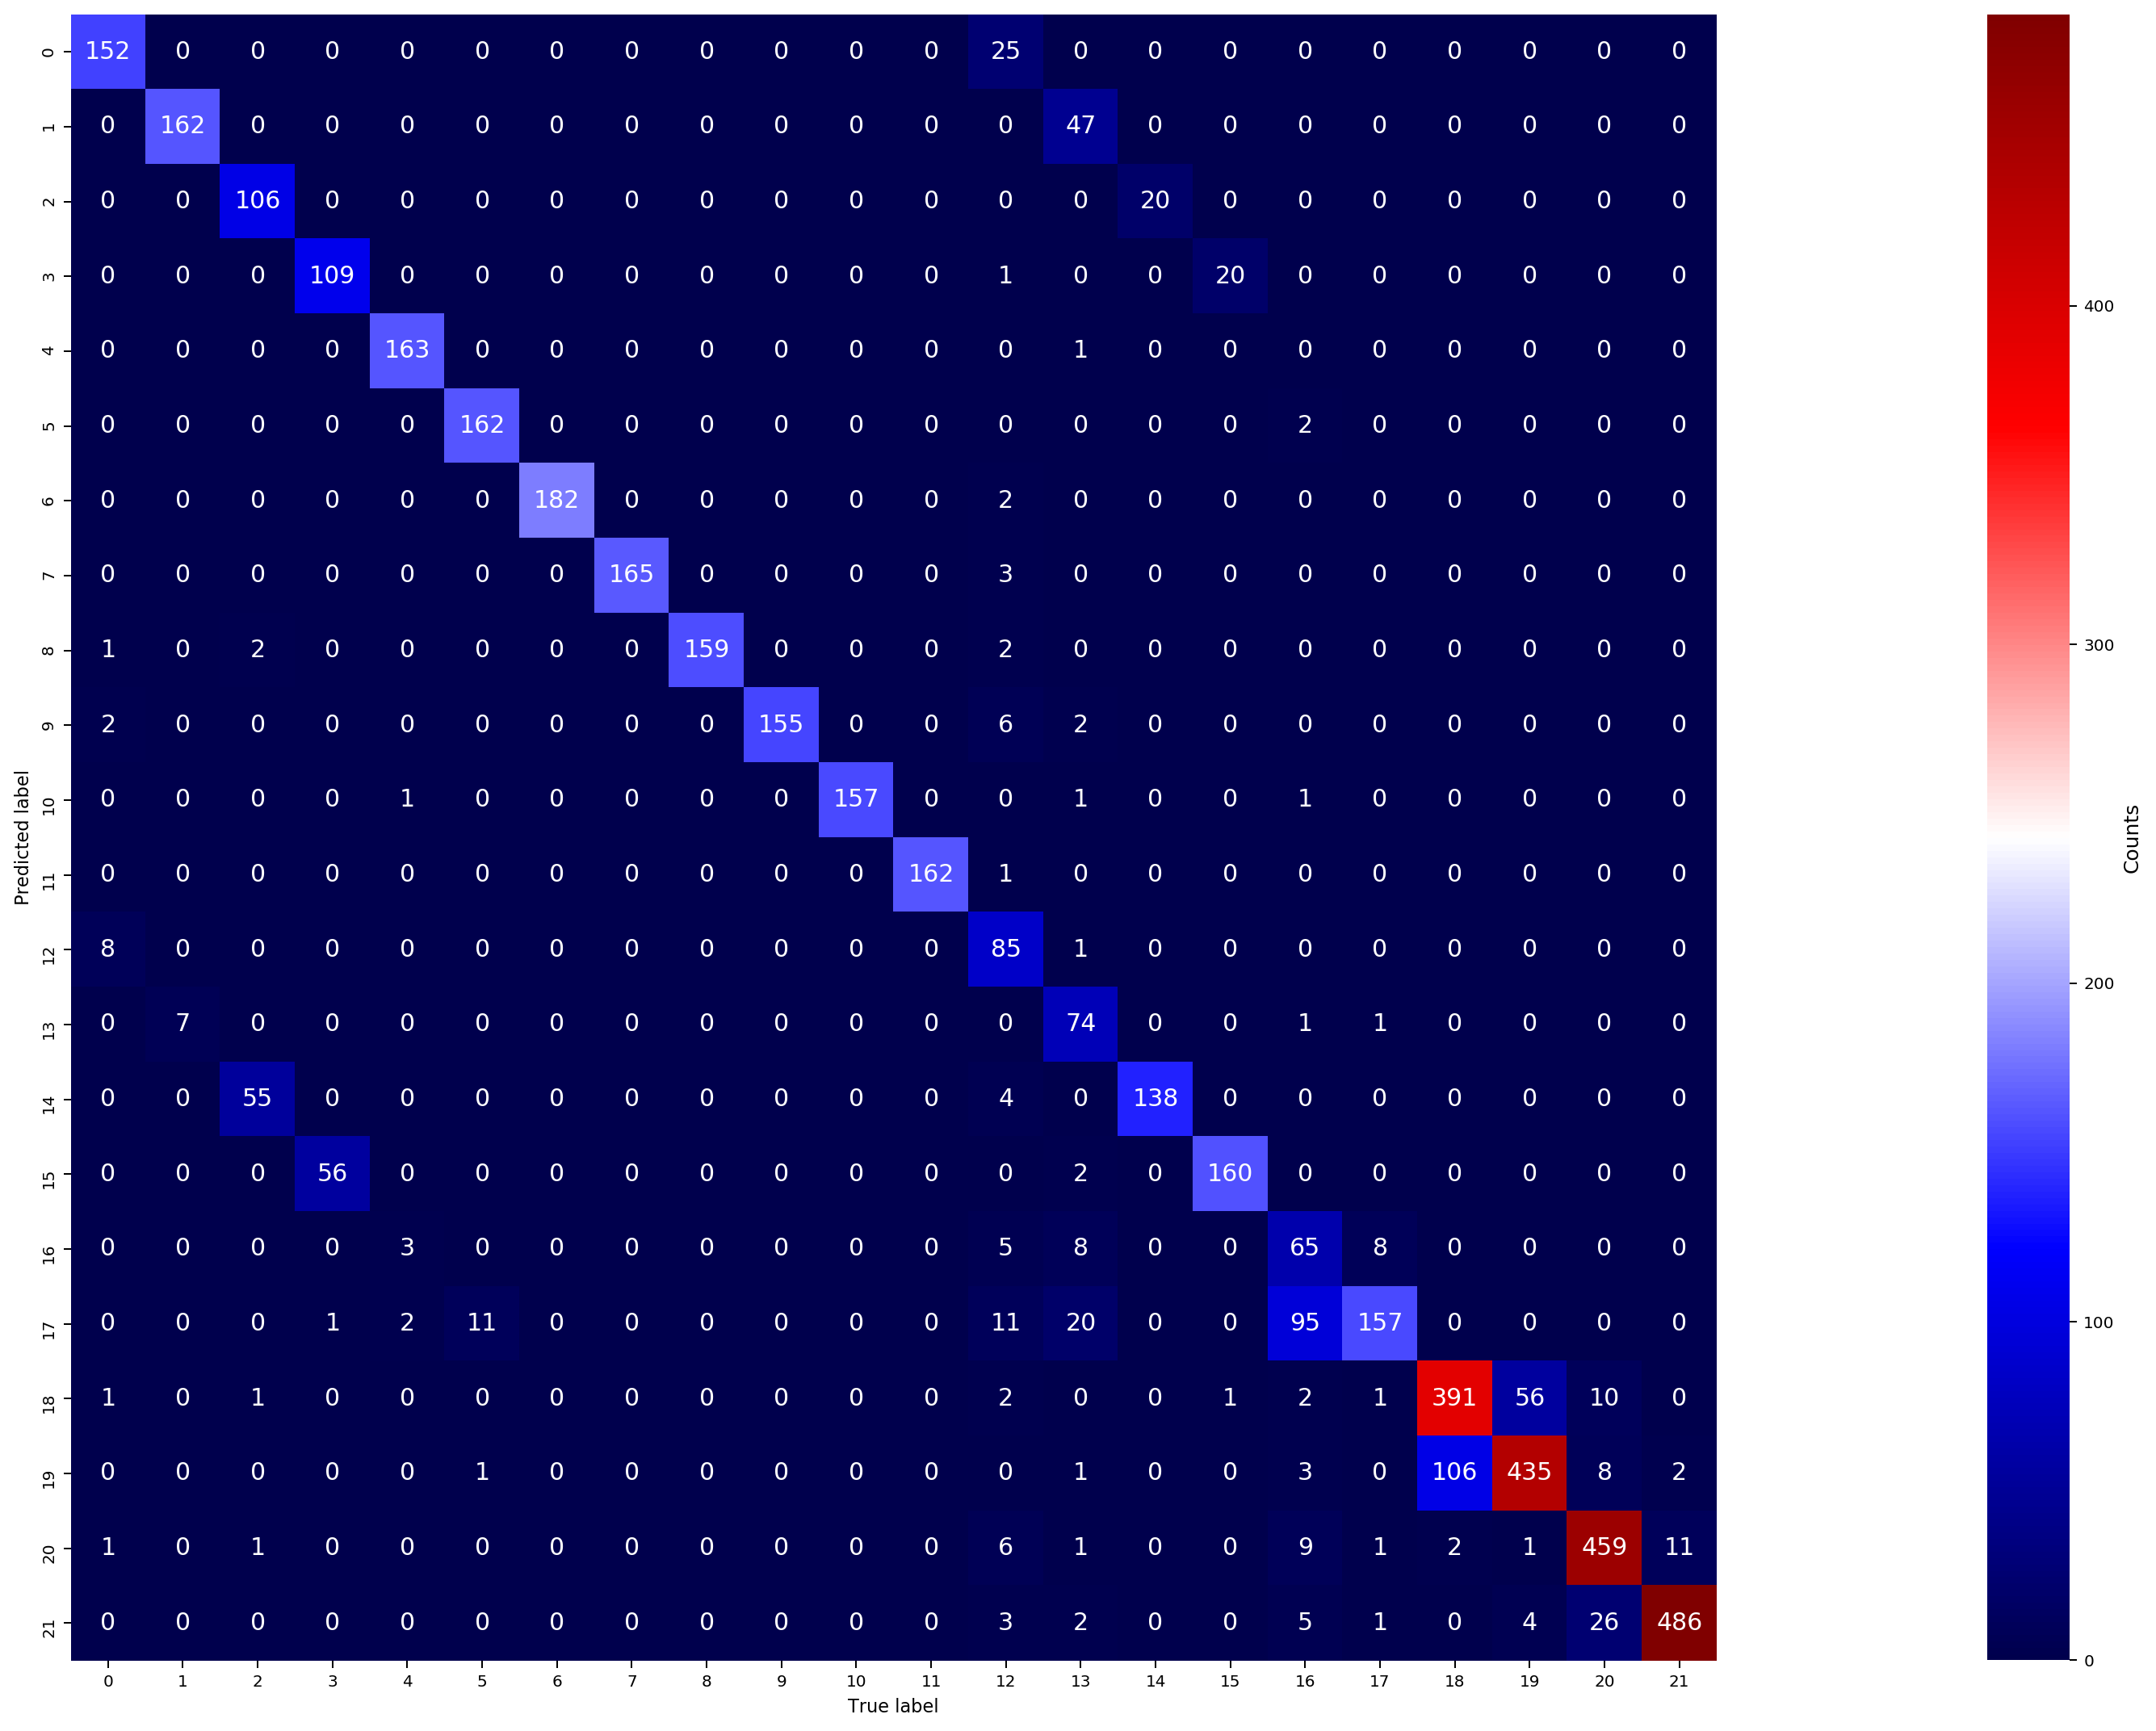

In [6]:
show_confusion_matrix(test.iloc[:,-1], Y_pred, np.unique(data.iloc[:,-1]))

From the confusion matrix, we can see that classifier makes mostly correct prediction. Most of it's mispredictions happen near the right corner. This is consistent with the data as we had created a 2-D data set and had added noise to the data to increase its dimensionality. This noise could have made the clusters more difficult to differentiate. <p>
We can also see that there are significant mis-classification for cluster 2 (predictor labelled them as 14). This is again consistent with the data. Cluster 14 had similar features to cluster 2. Moreover, we created cluster 14 to be noisy and spread out.

In [7]:
classifier.best_estimator_

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=8, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=54,
                  max_samples=0.55, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

We see that the estimator chooses the following parameters:
- weight: uniform
- number of neighbors: 8
- maximum samples: 55%
- maximum features: 10

#### Lessons Learned
From the cross verificatication accuracy, we see that we have scope of improvement. Moreover, our intuition about KNN was not absolutely accurate. From the confusion matrix, we realized that the preditor is mis-classfying because it has more neighbours of a different type that the correct type. I believe that we can attain more accuracy with a better classifier.

## Approach 2: Boosting with Decision Trees

#### Intuition
We wanted to try to improve our classifier. We gained valuable insights from the previous experiment. To improve our classifier, we will now try boosting as theoretically it boosts the performance of average classifiers.

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

train_boosting = False
# train_boosting = True

if train_boosting:
    param_grid = {
        "base_estimator" : [DecisionTreeClassifier(criterion=c,max_depth = d) for c in ["gini","entropy"] for d in list(range(1,10,2))],
        "n_estimators" : list(range(50,151,30)),
    }
    classifier = GridSearchCV(AdaBoostClassifier(),param_grid,n_jobs=-1,cv = 5,verbose = 10)
    classifier.fit(train.iloc[:,:-1],train.iloc[:,-1])
    dump(classifier,"./models/{}_boosting_classifier.joblib".format(fileName))
else:
    classifier = load("./models/{}_boosting_classifier.joblib".format(fileName))

In [9]:
from sklearn import metrics 

Y_pred = classifier.predict(test.iloc[:,:-1])

accuracy = metrics.accuracy_score(test.iloc[:,-1], Y_pred)

print('Accuracy of boosting: {:.2f}'.format(accuracy))

Accuracy of boosting: 0.90


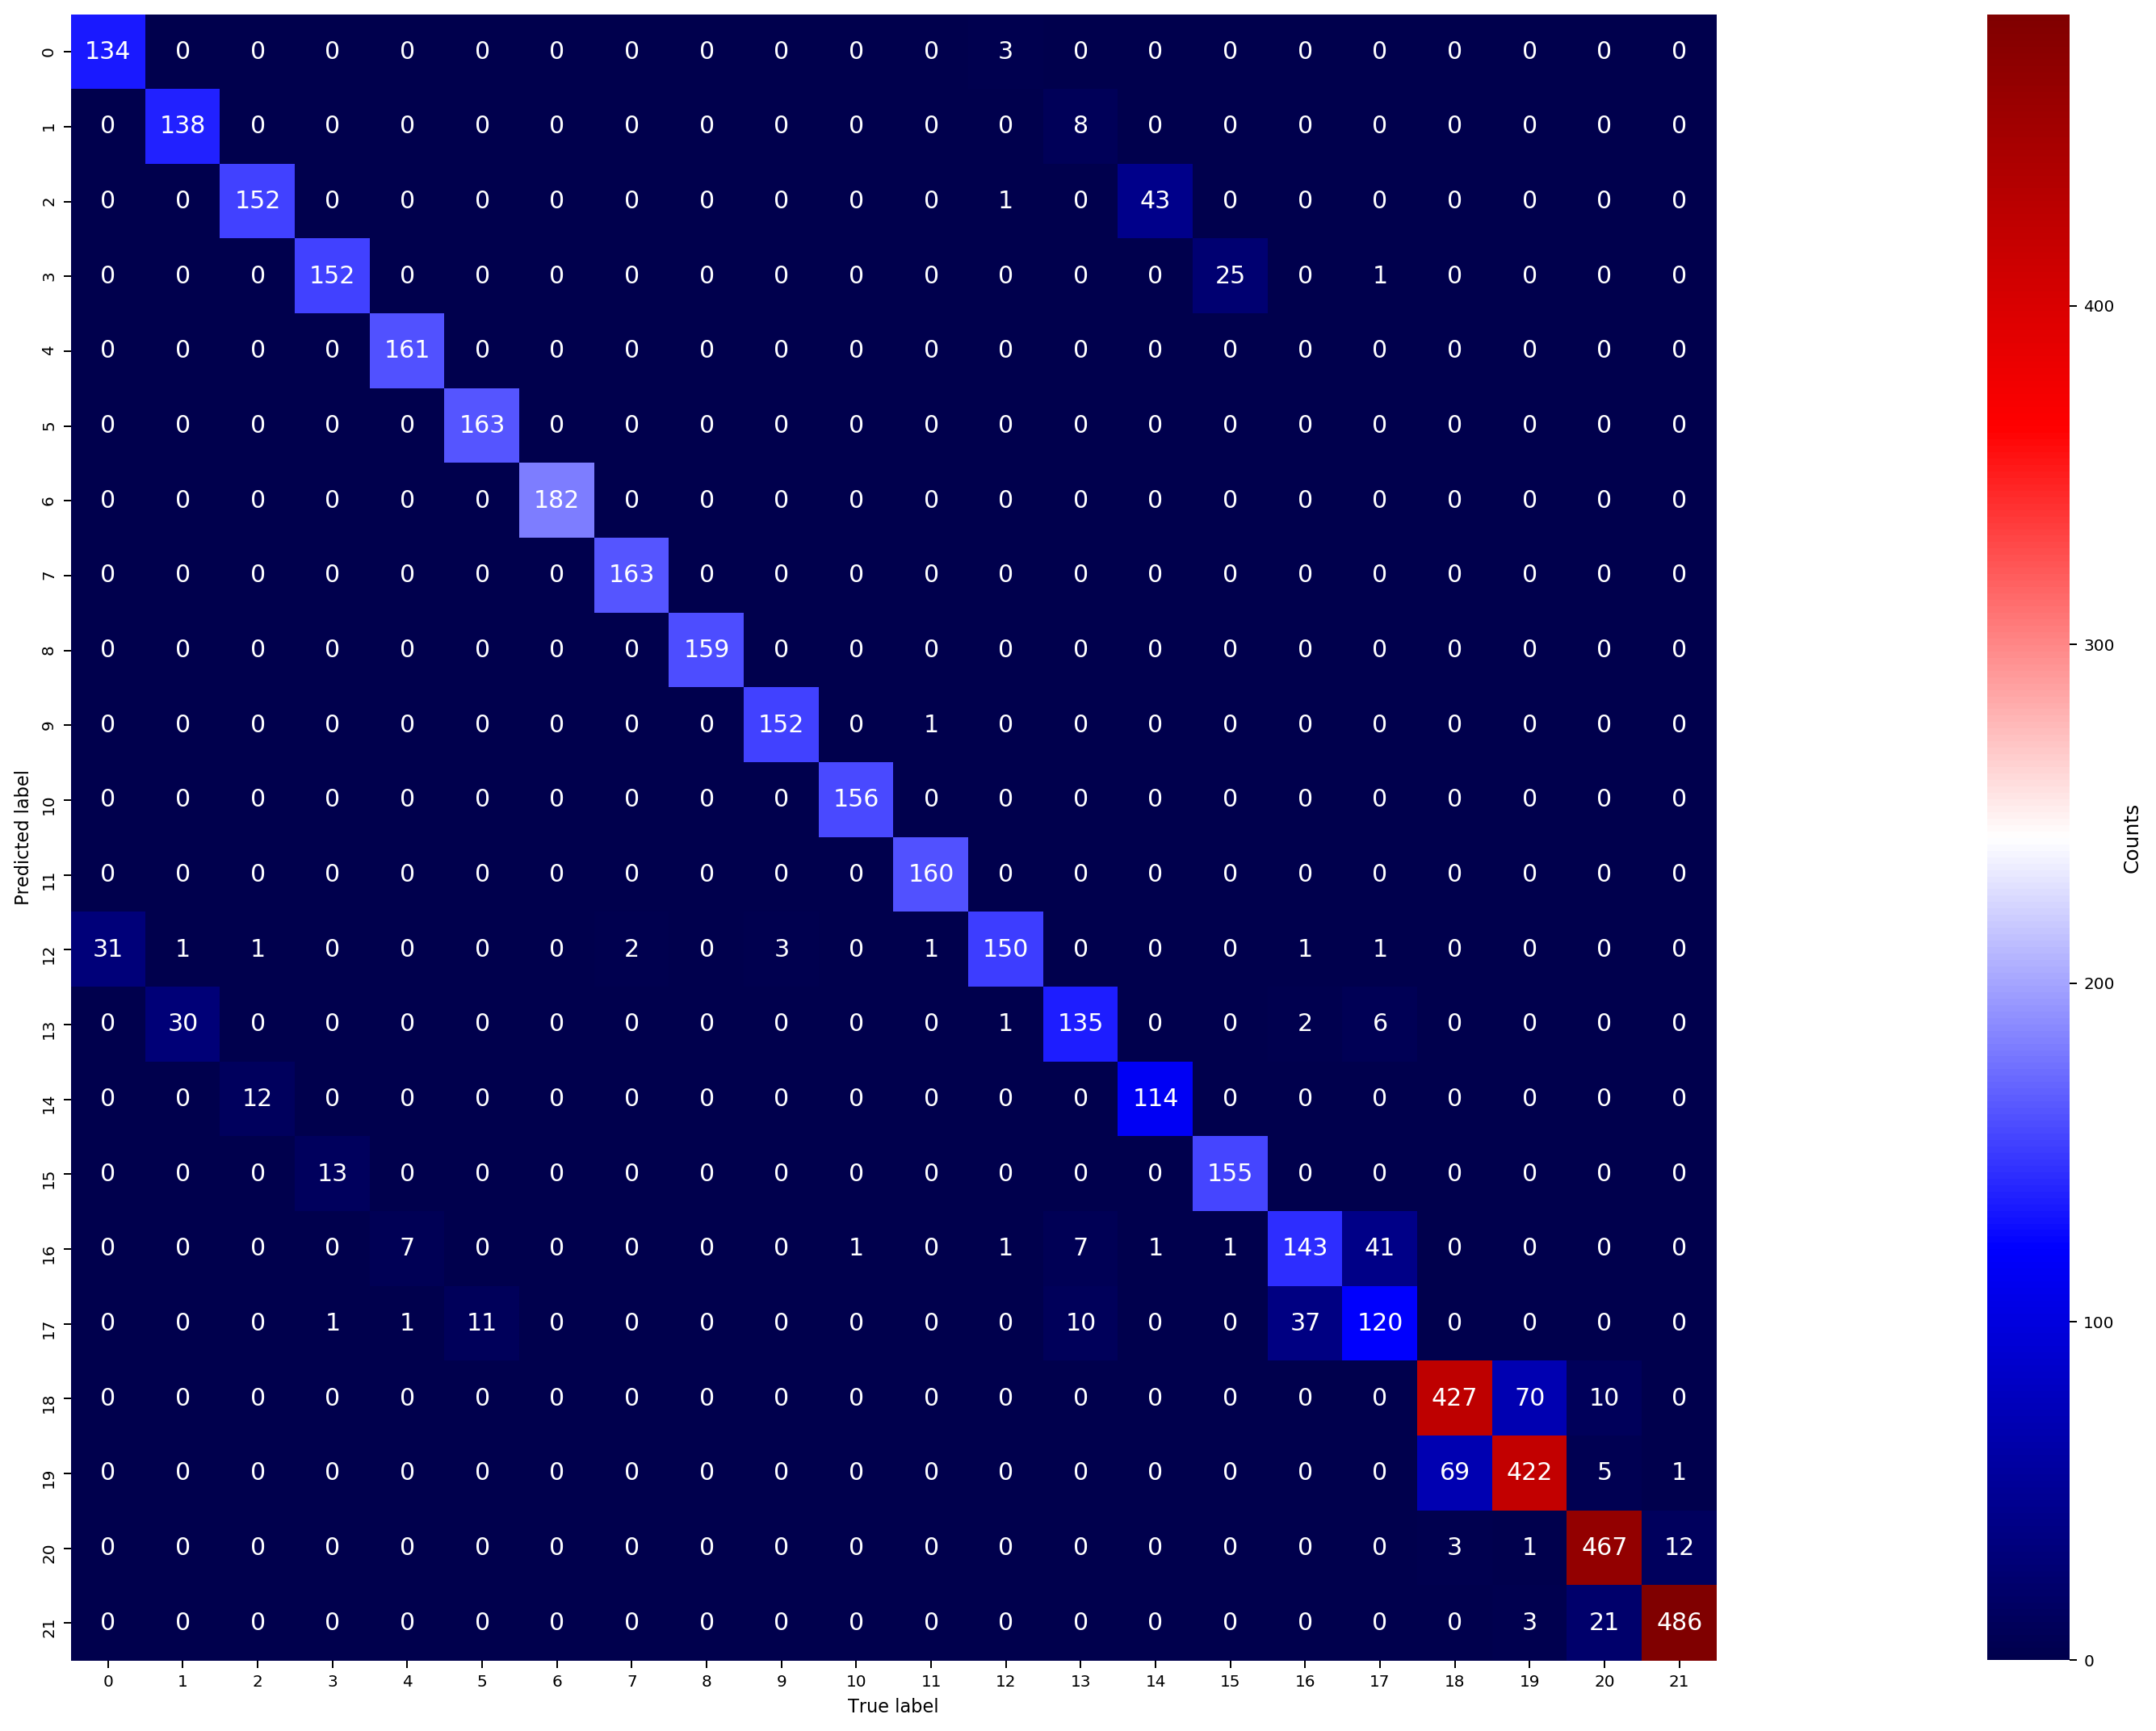

In [10]:
show_confusion_matrix(test.iloc[:,-1], Y_pred, np.unique(data.iloc[:,-1]))

From the confusion matrix, we can see that classifier makes mostly correct prediction. Most of it's mispredictions happen near the right corner. This is consistent with the data as we had created a 2-D data set and had added noise to the data to increase its dimensionality. This noise could have made the clusters more difficult to differentiate. This is similar to what we got using bagging.<p>
We can also see that there are significant mis-classification for cluster 2 (predictor labelled them as 14). This is again consistent with the data. Cluster 14 had similar features to cluster 2. Moreover, we created cluster 14 to be noisy and spread out. We see that the accuracy has improved when classifying these types of data.

In [11]:
classifier.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

We see that the estimator chooses the following parameters:
- criterion: entropy
- max depth: 9
- number of estimators: 140

#### Lessons Learned
From the cross verificatication accuracy, we see that we have achieved almost 90% accuracy. Our idea of using boosting with decision trees paid off. However, we still have a huge scope of improvement for clusters 12-15. I believe that we can attain more accuracy with a better classifier.

## Approach 3: SVM

#### Intuition
We wanted to try to improve our classifier. We gained valuable insights from the previous experiments. To improve our classifier, we will now try SVM. Our intuition is that other on the right corner, the classifiers are overfitting the data. Since, the data was generated in 2-D for those clusters and random noise was added, it is possible that a SVM would be able to classify it better.

In [12]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

train_svm = False
# train_svm = True

if train_svm:
    param_grid = {
        "kernel" : ["linear", "rbf","poly","sigmoid"],
        "degree" : list(range(1,10)),
    }
    classifier = GridSearchCV(svm.SVC(),param_grid,n_jobs=-1,cv = 5,verbose = 10)
    classifier.fit(train.iloc[:,:-1],train.iloc[:,-1])
    dump(classifier,"./models/{}_SVM_classifier.joblib".format(fileName))
else:
    classifier = load("./models/{}_SVM_classifier.joblib".format(fileName))

In [13]:
from sklearn import metrics 

Y_pred = classifier.predict(test.iloc[:,:-1])

accuracy = metrics.accuracy_score(test.iloc[:,-1], Y_pred)

print('Accuracy of SVM: {:.2f}'.format(accuracy))

Accuracy of SVM: 0.94


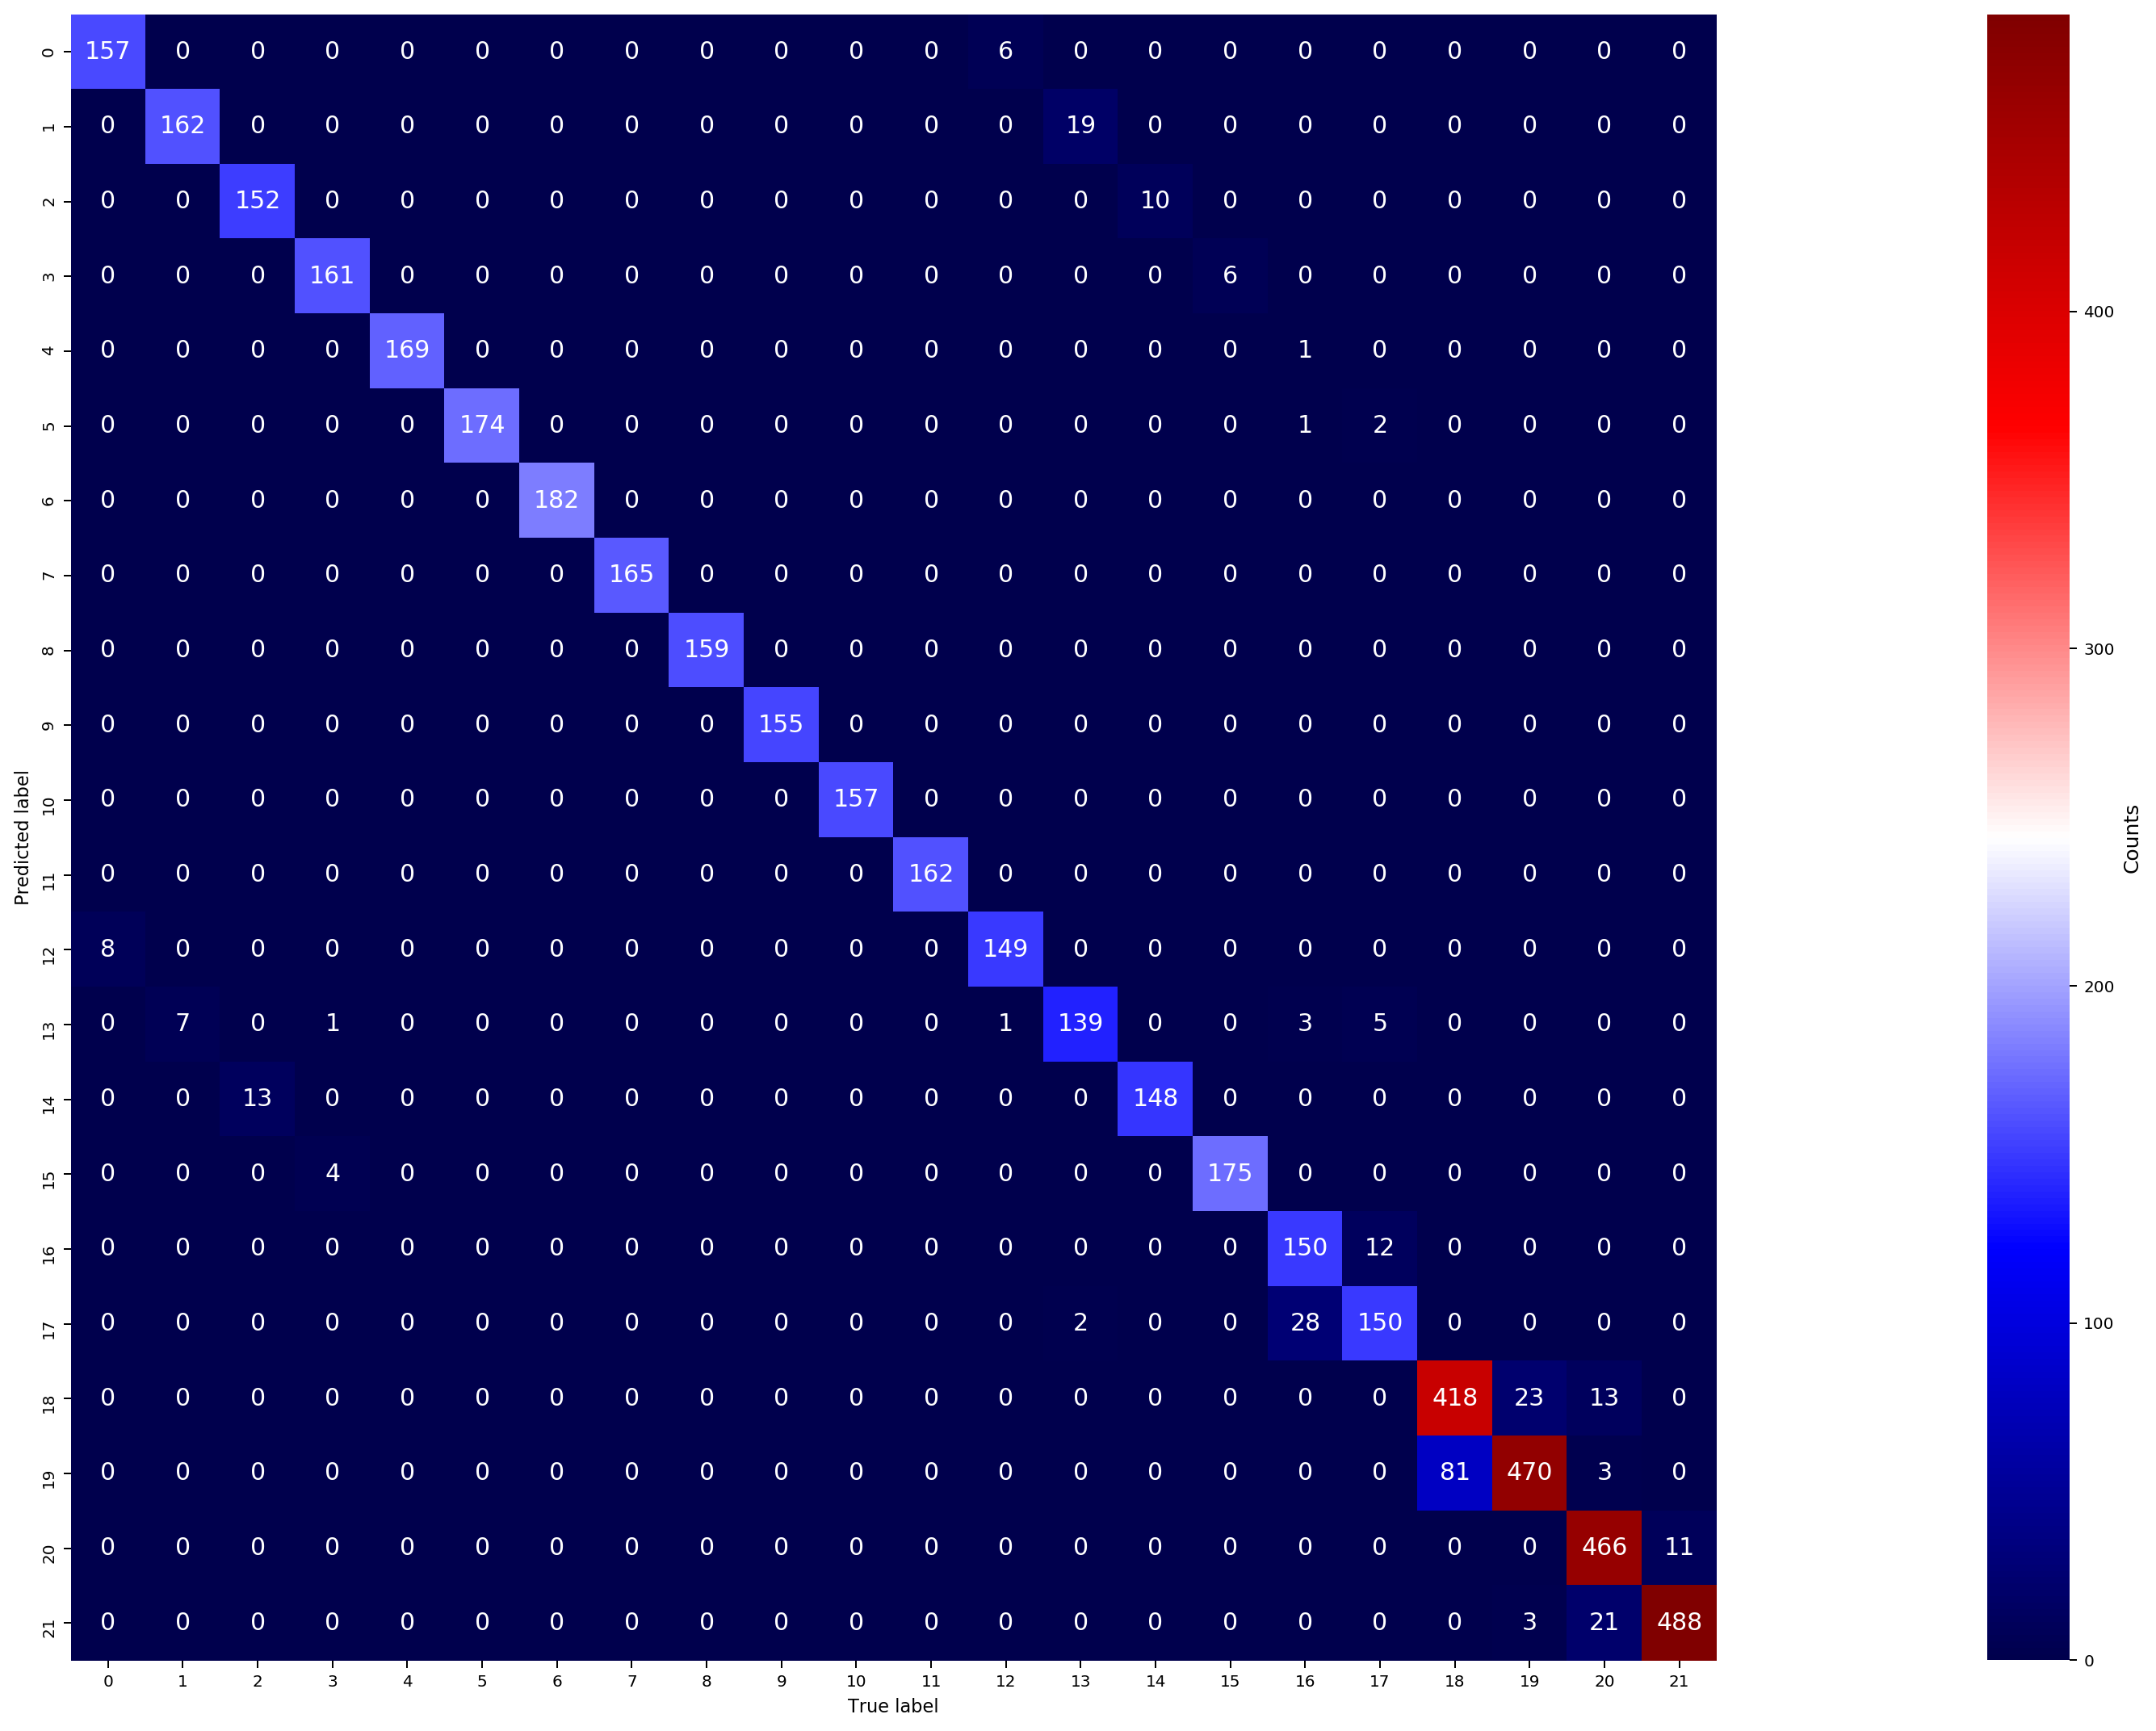

In [14]:
show_confusion_matrix(test.iloc[:,-1], Y_pred, np.unique(data.iloc[:,-1]))

From the confusion matrix, we can see that classifier makes mostly correct prediction. Most of it's mispredictions happen near the right corner. This is consistent with the data as we had created a 2-D data set and had added noise to the data to increase its dimensionality. This noise could have made the clusters more difficult to differentiate. This is similar to what we got in the previous iterations. However, we see that SVM has a lower generalization error here.<p>
We can also see that there are significant mis-classifications for cluster 2 (predictor labelled them as 14). This is again consistent with the data. Cluster 14 had similar features to cluster 2. Moreover, we created cluster 14 to be noisy and spread out. We see that the accuracy has improved when classifying these types of data.

In [15]:
classifier.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

We see that the estimator chooses the following parameters:
- kernel: rbf

#### Lessons Learned
From the cross validation, we see that we have achieved 94% accuracy. Overall, we can see that our idea of using SVM to classify our data worked well. We saw in class that SVCs can be improved by transforming linear features, and in our case RBF was used as the best kernel, which causes a greater accuracy. There are minor misclassifications evident in the confusion matrix, but these could be due to the intentional noise in the dataset which made the clusters harder to classify.